# PROVA INTELIGÊNCIA ARTIFICIAL

## 1 - (1 Ponto) Para cada um dos agentes a seguir, desenvolva uma descrição completando a tabela abaixo sobre o ambiente de tarefas de cada um.

(a) Agente comentarista de jogo.

(b) Agente sugestor de vinho.

(c) Agente treinador de time (como de basquete).


| Agente | Medida de desempenho                                 | Ambiente                             | Atuadores            | Sensores                             |
|--------|------------------------------------------------------|--------------------------------------|----------------------|--------------------------------------|
| (a)    | Tornar evidente as estratégias que estão acontecendo | Partida que está sendo realizada     | Emitir som de fala   | Imagens da partida                   |
| (b)    | Satisfação dos clientes do estabelecimento           | Estabelecimento onde se vende vinhos | Sugerir uma seleção de vinhos | Lista de vinhos disponiveis no local |
| (c)    | Vitória do time                                      | Partida do esporte em questão        | Instrução de táticas | Imagens da partida                   |

## 2 - (2 Pontos) Diferencie os 4 tipos de aprendizado de máquina. Para tanto, escolha uma base de dados do Kaggle e explique como aplicar os 4 métodos nessa mesma base.

A base escolhida foi '*spotify-music-analysis*' onde, através da API do Spotify, foram retiradas algumas informações sobre uma lista de músicas. Para mais informações sobre o significado dos atributos da base, entre em [AudioFeaturesObject](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features).

### Aprendizagem Supervisionada
O objetivo do algoritmo de aprendizagem supervisionada é estabelecer um classificador que identifique as classes através de exemplos dados. Ou seja, dado um conjunto de exemplos que determina a classe rótulo, quando dado um novo conjunto de exemplos, o algoritmo deve ser capaz de classificar de acordo com as classes dos dados de treinamento.
Neste contexto da base 'spotify-music-analysis', pode se estabelecer como classe rótulo 'mode' onde se refere a dado aquele tom (*key*) possui um configuração de escala menor(0) ou maior(1).
Caso os atributos sejam discretos, deve se usar o modelo preditivo classificação. Neste caso é mais apropriado o método preditivo regressão por conta dos atributos selecionados.

#### Exemplo de aplicação do modelo Regressão


In [573]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

data_frame = pd.read_csv("../db/data.csv")
data_frame = data_frame.drop("Unnamed: 0", axis="columns")

#data_frame.drop(data_frame.columns.difference(['key','mode','valence']), 1, inplace=True)
data_frame.head(5)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


Plotaremos um diagrama:

In [574]:
import plotly.express as px

df_sample = data_frame.sample(n=500)

mkey = []

for i in df_sample.index:
    if df_sample['mode'][i] == 1:
        mkey.append(df_sample['key'][i] + 0.5)
    else:
        mkey.append(df_sample['key'][i])


df_scatter = pd.DataFrame({
    'mkey' : mkey,
    'valence' : df_sample.get('valence')
})


fig  = px.scatter(df_sample, x = 'valence',y = 'mode', log_x = True, width = 800)
fig.update_traces(marker = dict(size = 12, line=dict(width = 2)), selector = dict(mode = 'markers'))
fig.update_layout(title = 'Diagram valence x mode')
fig.update_xaxes(title = 'Valence')
fig.update_yaxes(title = 'Mode')
fig.show()

O diagrama nos permite classificar essa amostragem, dada a escala, se aquela música vai ser mais alegre ou mais triste

### Aprendizagem Não Supervisionada

Neste tipo de aprendizagem, o indutor analisa os exemplos fornecidos e tentar classificar através de agrupamento.
Ainda na base *spotify-music-analysis*, um exemplo desse tipo de aprendizagem pode ser dado pelo atributo *danceability* onde descreve o qual recomendada é uma música para dançar. Isso é feito pelo agrupamento de elementos musicais como "*tempo, rhythm stability, beat strength, and overall regularity.*"

### Aprendizagem Semi-Supervisionada
É a abordagem de *machine learning* que combina uma pequena amostra de dados classificados com uma grande quantidade de dados não classificados durante o treinamento.
Com referência nessa base de dados *spotify-music-analysis*, poderiamos através da API disponibilizada pelo Spotify, gerar uma quantidade maior de dados para se treinar o agente inteligente para fins de se classificar quais músicas são dançantes ou não.

### Aprendizagem por Reforço

É uma abordagem na qual o agente inteligente realiza ações na base da "tentativa e erro" a fim de se possibilitar a tomada de ação com uma taxa de sucesso cada vez maior. Para isso, a cada ação correta o agente recebe uma recompensa. Caso contrário, é penalizado.
No contexto de dados de músicas retiradas do Spotify, poderiamos treinar um agente para classificar dinamicamente o quão dançantes são as músicas que estão sendo reproduzidas no player.

## 3 - (5 Pontos) Em um Jupyter Notebook (link do collab, GitHub ou arquivo), utilize o método K vizinhos mais próximos na base escolhida na questão anterior para um contexto SUPERVISIONADO e para classificação:

### 1. Aplique processos de pré-processamento e os necessários para execução do método K-NN.

Para a base utilizada na questão anterior, será realizada o pré-processamento de :
* Eliminação de atributos

In [575]:
data_frame.drop(columns=['song_title','artist', 'duration_ms', 'speechiness', 'tempo', 'time_signature', 'target', 'key', 'mode'])

,acousticness,danceability,energy,instrumentalness,liveness,loudness,valence
0,0.01020,0.833,0.434,0.021900,0.1650,-8.795,0.286
1,0.19900,0.743,0.359,0.006110,0.1370,-10.401,0.588
2,0.03440,0.838,0.412,0.000234,0.1590,-7.148,0.173
3,0.60400,0.494,0.338,0.510000,0.0922,-15.236,0.230
4,0.18000,0.678,0.561,0.512000,0.4390,-11.648,0.904
...,...,...,...,...,...,...,...
2012,0.00106,0.584,0.932,0.002690,0.1290,-3.501,0.211
2013,0.08770,0.894,0.892,0.001670,0.0528,-2.663,0.867
2014,0.00857,0.637,0.935,0.003990,0.2140,-2.467,0.470
2015,0.00164,0.557,0.992,0.677000,0.0913,-2.735,0.623


### 2. Aplique correlação ou PCA e seleciona um número menor de atributos com esses métodos e justifique sua decisão.

In [576]:
corr = data_frame.corr()
corr.style.background_gradient(cmap='coolwarm')

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
acousticness,1.000000,-0.179894,0.071536,-0.646319,0.144397,-0.081037,-0.117126,-0.562021,0.068028,-0.099893,-0.127596,-0.190353,-0.152227,-0.129627
danceability,-0.179894,1.000000,0.004695,0.038557,-0.130561,0.022325,-0.132044,0.104362,-0.047867,0.142661,-0.143538,0.128909,0.442061,0.176706
duration_ms,0.071536,0.004695,1.000000,-0.144473,0.305403,0.023570,0.023203,-0.273798,-0.074806,-0.079562,-0.076469,-0.040157,-0.120030,0.146749
energy,-0.646319,0.038557,-0.144473,1.000000,-0.122890,0.072886,0.217435,0.762177,-0.070263,0.093102,0.165721,0.182895,0.278383,0.039688
instrumentalness,0.144397,-0.130561,0.305403,-0.122890,1.000000,-0.009640,0.001063,-0.354625,-0.030099,-0.155349,0.000347,-0.070721,-0.194630,0.152594
key,-0.081037,0.022325,0.023570,0.072886,-0.009640,1.000000,0.049739,0.050929,-0.195040,0.019116,0.040301,0.024937,0.032485,0.033594
liveness,-0.117126,-0.132044,0.023203,0.217435,0.001063,0.049739,1.000000,0.156648,-0.018587,0.092403,0.010558,0.018199,-0.053011,0.026364
loudness,-0.562021,0.104362,-0.273798,0.762177,-0.354625,0.050929,0.156648,1.000000,-0.044015,0.088844,0.156418,0.143011,0.204968,-0.072000
mode,0.068028,-0.047867,-0.074806,-0.070263,-0.030099,-0.195040,-0.018587,-0.044015,1.000000,-0.049398,-0.059995,-0.039038,-0.032879,-0.072336
speechiness,-0.099893,0.142661,-0.079562,0.093102,-0.155349,0.019116,0.092403,0.088844,-0.049398,1.000000,0.111359,0.113529,0.054419,0.154006


Serão eliminados todos os atributos menos os:
* *energy* - classe alvo
* *loudness*
* *liveness*
* *valence*
Pois eles possuem correlação positiva com a classe alvo.

In [577]:
data_frame.drop(data_frame.columns.difference(['energy','loudness','liveness','valence']), 1, inplace=True)

### 3. Escolha 5 valores de K e mostre os resultados (escolha 3 métricas de avaliação e mostre a matriz de confusão) e explique os resultados encontrados.

In [578]:
import matplotlib.pyplot as plt
from sklearn import cluster, neighbors, svm, metrics, preprocessing
import numpy as np

training_sample = data_frame.sample(frac=0.8, random_state=1)
test_sample = pd.concat([data_frame, training_sample]).drop_duplicates(keep=False)

training_target = training_sample["energy"]
test_target = test_sample["energy"]

copy_of_training_sample_with_energy_column = pd.DataFrame(training_sample)

del test_sample["energy"]
del training_sample["energy"]


knn = neighbors.KNeighborsRegressor(n_neighbors=5, algorithm='auto')
knn.fit(training_sample,training_target)

resultKNN = knn.predict(test_sample)


print("\nK-NN")
print("Mean Squared Error:\n %0.2f" % (metrics.mean_squared_error(test_target, resultKNN, squared=True)))

print("Mean Absolute Error:\n {:.2f}".format(metrics.mean_absolute_error(test_target, resultKNN)))

print("Root Mean Squared Error:\n %0.2f" % (metrics.mean_squared_error(test_target, resultKNN, squared=False)))


K-NN
Mean Squared Error:
 0.02
Mean Absolute Error:
 0.12
Root Mean Squared Error:
 0.15


Na métrica de MSE (Mean Squared Error), por usar Quadrática, quanto maior a diferença entre os valores esperados e o predito, maior seria o valor.
Na métrica de MAE (Mean Absolute Error), calcula o erro absoluto entre os valores preditos e os esperados.
Por fim, o RMSE (Root Mean Squared Error) que é bom para avaliar a perfomance do modelo.

Os resultados exibidos acima para métricas de regressão, os melhores resultados são os menores (ou seja, mais próximos de zero).

### 4 - Escolha 2 métricas de similaridade (diferentes distâncias ou outras métricas - correlação, por exemplo) para definir o(s) vizinho(s) mais próximos e explique os resultados encontrados.

#### Correlação de Pearson

O método de correlação de Pearson diz o quanto os 2 itens estão correlacionados.
Se o valor obtido for mais próximo de 1, significa que os itens são correlacionados positivamente.
E caso for mais próximo de -1, a correlação é negativa.


In [579]:
np.corrcoef(x= test_target, y=resultKNN)

array([[1.        , 0.72990781],
       [0.72990781, 1.        ]])

#### Distância Euclidiana

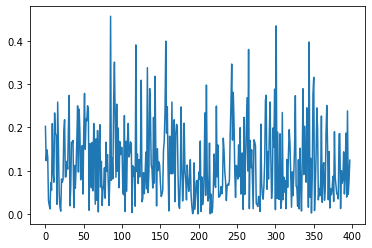

In [580]:
from scipy.spatial import distance
dst = []
test_target = pd.DataFrame(test_target.reset_index()['energy'])


for i in test_target.index:
    dst.append(distance.euclidean(test_target['energy'][i], resultKNN.item(i)))

plt.plot(dst)

Por conta da distância euclidiana não ter sido dado nenhum valor acima de 1, logo o melhor K vizinho seria o proposto (K = 5)

### 5 - Melhor K e melhor distância e testar com o conjunto de atributos do item 2.

Como dito na questão anterior, o melhor K é o 5 pois na distância euclidiana não foi encontrado nenhum valor maior que 1 para que possibilitasse um outro valor para K.
Já a melhor distância:

In [581]:
least_distance = [1.0]
for i in test_target.index:
    if dst[i] < least_distance[0]:
        least_distance.clear()
        least_distance.append(dst[i])

print('Least distance: ', least_distance)

data_frame = pd.read_csv("../db/data.csv")
data_frame = data_frame.drop("Unnamed: 0", axis="columns")

data_frame.drop(columns=['song_title','artist', 'duration_ms', 'speechiness', 'tempo', 'time_signature', 'target', 'key', 'mode'])

training_sample = data_frame.sample(frac=0.8, random_state=1)
test_sample = pd.concat([data_frame, training_sample]).drop_duplicates(keep=False)

training_target = training_sample["energy"]
test_target = test_sample["energy"]

del test_sample["energy"]
del training_sample["energy"]
del training_sample['artist']
del training_sample['song_title']
del test_sample['artist']
del test_sample['song_title']



knn = neighbors.KNeighborsRegressor(n_neighbors=5, algorithm='auto')
knn.fit(training_sample,training_target)

resultKNN = knn.predict(test_sample)


print("\nK-NN")
print("Mean Squared Error:\n %0.2f" % (metrics.mean_squared_error(test_target, resultKNN, squared=True)))

Least distance:  [0.00040000000000006697]

K-NN
Mean Squared Error:
 0.06
